<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>




# Курсова робота із методів оптимізації на тему:
##**Метод найшвидшого спуску**
Виконала: студентка групи КМ-82, Бурлаченко Яна Борисівна

#####Керівник: доктор фізико-математичних наук Норкін Богдан Володимирович


#Зміст


* Анотація
* Вступ
* Постановка задачі
* Матеріали та методи
* Розв'язання задачі
 *  Імпорт необхідних бібліотек
 *  Визначення констант
 *  Визначення функцій
 *  Обчислення
 *  Виведення результатів
* Висновки
* Автори
* Список використаних джерел











# Анотація

У даній курсовій роботі розглядається метод найшвидшого спуску та дослідження методу при мінімізації кореневої функції в залежності від різних факторів, які більш детально указані в постановці задачі. Також виконано метод штрафних функцій (метод зовнішньої точки) для умовної оптимізації при розташування локального мінімума поза випуклої допустимої області.

# Вступ

Методи оптимізації є надзвичайно важливими у реаліях сучасного життя, коли обмеженість часу та інших ресурсів відчувається гостріше, ніж будь-коли. Якщо користувачу інтернет-магазину доведеться чекати не частку, а всю секунду при клікові на товар, який додається до корзини, скоріше всього, він буде шукати інший, магазин, ніж дозволить собі кожен раз чекати. Якщо виробництво неграмотно буде використовувати ресурси, існує пряма загроза прибутку, а отже, бізнесу в цілому.
На щастя, майже будь-який процес можна виразити та опрацювати математично, а отже оптимізувати.
Сам же метод найшвидшого спуску, зі своїми модифікаціями, застосовується для навчання математичних та комп'ютерних моделей. Також він використовується в теорії штучних нейронних мереж.
Саме тому, щоб належно застосовувати методи, є важливим не просто використовувати готові програми, але й самому розбиратися в алгоритмі та програмній реалізації.

# Постановка задачі

1. Дослідити збіжність методу найшвидшого спуску при мінімізації кореневої функції  в залежності від:
 * Величини кроку h при обчисленні похідних.
 * Схеми обчислення похідних.
 * Способу обчислення кроку : постійний, оптимальний.
 * Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
 * Точності методу одновимірного пошуку.
 * Значення параметру в алгоритмі Свена.
 * Вигляду критерію закінчення.
 * Наявності модифікацій (методи Бута, Люстерніка, важкої кульки).
2. Використати метод штрафних функцій (метод зовнішньої точки) для умовної оптимізації при розташування локального мінімума поза випуклої допустимої області.


# Матеріали та методи

Як уже було вказано раніше, у даній роботі використовується метод найшвидшого спуску. Розглянемо його алгоритм:

1. Задаються координати початкової точки *x[0]*.
2. У точці *x[k]*, *k = 0, 1, 2, ...* обчислюється значення градієнта *f'(x[k])*.
3. Визначається довжина кроку $h_k$.
4. Визначаються координати точки *x[k+1]*.
5. Перевіряється умова зупинки ітераційного процесу. Якщо виконується - отримана точка і буде результуючою. У протилежному випадку починається знову виконання пунктів 1-5.

У другому завданні:
Задаємо випуклу область у вигляді обмеження *g(x)*. Представляємо у вигляді нерівності $g(x) >= 0$s
Штрафна функція має вигляд:

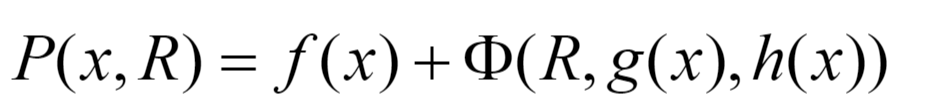

R = 1
Тепер застосовуємо метод із новою штрафною ф-цією. Отримується перший мінімум. Збільшуємо штраф, повторюємо, отримуємо другий мінімум. Якщо різниця другого та першого менша за необхідну точність, то закінчуємо ітераційний процес. Якщо ні - знову збільшуємо штраф, знаходимо третій мінімум і тд.

Критерії для першого завдання:

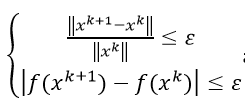

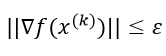

# Розв'язання задачі

#### Імпорт необхідних бібліотек

In [1]:
import math
import numpy as np
import matplotlib.pylab as plt
from sympy import *

#### Визначення констант

Константа-лічильник ітераційних процесів, стандартний крок та штраф(для 2го завдання):

In [2]:
count = 0
H = 0.000000000001 #--------------STEP---------------
R_func = 1

#### Визначення функцій

Функції для підрахунку ітерацій:

In [3]:
def incCount():
    global count
    count = count+1

def zeroCount():
    global count
    count = 0

Задання цільової функції:

In [4]:
def fun(x):
    incCount()
    return (10*(x[0] - x[1])**2 + (x[0] - 1)**2)**(1/4)
    # return (10*(x[0] - x[1])**2 + (x[0] - 1)**2)**(1/4) + R_func*(cut(circle_region(x))**2) #---------TASK-2----

Визначення області (для 2го завдання)

In [5]:
def circle_region(x):
    return  1- (x[0]+1)**2 + (x[1])**2

Функції базових математичних операцій над векторами:

In [6]:
def sub(x, y): #різниця
    res = []
    for i in range(len(x)):
        res.append(x[i] - y[i])
    return res

def sums(x, y): #сума add
    res = []
    for i in range(len(x)):
        res.append(x[i] + y[i])
    return res        

def mults(x, n): #добуток
    res = []
    for i in range(len(x)):
        res.append(x[i]*n)
    return res

Функції для обчислення наступної точки:

In [7]:
def calcX(x0, grad, lmb): #звичайна формула
    '''
        x0 - gradient*lambda
    '''
    return sub(x0, mults(grad, lmb))

def heavy_ball(x0, x1, grad, lmb): #метод важкої кульки
    return sums(sub(x1, mults(grad, lmb)), mults(0.8/0.99, sub(x0, x1)))

Обчислення похідних за трьома схемами:

In [8]:
def derivative_central(x, n): #центральна різницева схема
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(H)
        else:
            h.append(0)
    # h = 0.000000000001
    return (fun([x[0] + h[0], x[1] + h[1]]) - fun([x[0] - h[0], x[1] - h[1]]))/(2*h[n])

def derivative_right(x, n): #права різницева схема
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(H)
        else:
            h.append(0)
    return (fun([x[0] + h[0], x[1] + h[1]]) - fun([x[0], x[1]]))/(h[n])

def derivative_left(x, n): #ліва різницева схема
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(H)
        else:
            h.append(0)
    return (fun([x[0], x[1]]) - fun([x[0] - h[0], x[1] - h[1]]))/(h[n])

Алгоритм Свена:

In [9]:
def svenn(x0, grad, lmb, delta):
    """
        One-dimensional Svenn search
    """
    #print "Svenn stage..."
    f0 = fun(calcX(x0, grad, lmb))
    if f0 < fun(calcX(x0, grad, lmb+delta)):
        delta = -delta
    x1 = lmb + delta
    f1 = fun(calcX(x0, grad, x1))
    while f1 < f0:
        delta *= 2
        lmb = x1
        x1 = lmb + delta
        f0 = f1
        f1 = fun(calcX(x0, grad, x1))
    a = lmb + delta/2
    b = lmb - delta/2        
    if f0 < f1:
        if a < b:
            return [a, b]
        else:
            return [b, a]
    elif f1 < f0:
        if lmb < x1:
            return [lmb, x1]
        else:
            return [x1, lmb]
    else:
        if lmb < b:
            return [lmb, b]
        else:
            return [b, lmb]

Метод золотого перетину:

In [10]:
def gold(x0, grad, eps, lmb, delta):
    line = svenn(x0, grad, lmb, delta)
    a = line[0]
    b = line[1]
    """
        One-dimensional gold search
    """
    l = b - a
    x1 = a + 0.382*l
    x2 = a + 0.618*l
    while l > eps:
        if fun(calcX(x0, grad, x1)) < fun(calcX(x0, grad, x2)):
            b = x2
            x2 = x1
            l = b - a
            x1 = a + 0.382*l
        else:
            a = x1
            x1 = x2
            l = b - a
            x2 = a + 0.618*l
    # print("gold a: " + str(a))
    # print("gold b: " + str(b))
    # return [a, b] 
    return (a+b)/2

Методи ДСК та ДСК-Пауелла

In [11]:
def dsc(x0, grad, lmb, delta):
    svenn_res = svenn(x0, grad, lmb, delta)
    x1 = svenn_res[0]
    x3 = svenn_res[1]
    x2 = (x1 + x3)/2
    f1 = fun(calcX(x0, grad, x1))
    f2 = fun(calcX(x0, grad, x2))
    f3 = fun(calcX(x0, grad, x3))
    xApprox = x2 + ((x3 - x2) * (f1 - f3)) / (2 * (f1 - 2 * f2 + f3))
    return [x1, x2, x3, xApprox]


def dscPowell(x0, grad, eps, lmb, delta):
    dsc_res = dsc(x0, grad, lmb, delta)
    a = dsc_res[0]
    xmin = dsc_res[1]
    b = dsc_res[2]
    xApprox = dsc_res[3]

    while abs(xmin-xApprox) >= eps or abs(fun(calcX(x0, grad, xmin)) - fun(calcX(x0, grad, xApprox))) >= eps:
        if xApprox < xmin:
            b = xmin
        else:
            a = xmin
        xmin = xApprox
        funcRes =  [fun(calcX(x0, grad, a)), fun(calcX(x0, grad, xmin)), fun(calcX(x0, grad, b))]
        a1 = (funcRes[1] - funcRes[0]) / (xmin - a)
        a2 = ((funcRes[2] - funcRes[0]) / (b - a) - a1) / (b - xmin)
        xApprox = (a + xmin) / 2 - a1 / (2 * a2)
    return xmin

Обчислення градієнту, норми та $\lambda$:

In [12]:
def gradient(x):
    grad = []
    for i in range(len(x)):
        grad.append(derivative_central(x, i)) #----------DERIVATIVE-------------
    return grad 
    
def norm(s1):
    normas = 0
    for i in range(len(s1)):
        normas += s1[i]**2
    return math.sqrt(normas)

def calcLambda(x0, grad, eps, lmb, delta):
    '''
    # line = svenn(x0, grad, lmb, 0.1)
    # line = gold(line[0], line[1], eps, x0, grad) 
    # lmb = (line[0] + line[1])/2
    # return lmb 
    '''
    # lmb = gold(x0, grad, eps, lmb, delta) #---------------GOLD----------
    lmb = dscPowell(x0, grad, eps, lmb, delta) #----------DSC-POWELL------
    if abs(lmb) > 5:
        return 5
    else: return lmb

Побудова графіку:

In [13]:
def plot(points, col):
    n = 256
    x = np.linspace(-5, 5, n)
    y = np.linspace(-5, 5, n)
    X, Y = np.meshgrid(x, y)
    
    xs = []
    ys = []
    
    plt.contourf(X, Y, fun([X, Y]), 8, alpha=.75, cmap='jet')
    C = plt.contour(X, Y, fun([X, Y]), 8, colors='black') 
    
    for i in range(len(points)):
        xs.append(points[i][0])
        ys.append(points[i][1])
    
    plt.plot(xs, ys, marker='o', linestyle='--', color=str(col), label='Square')

Модифікація: метод важкої кульки

In [14]:
def heavy_ball(xk, x_1, grad, lmb):
    return sums(sub(xk, mults(grad, lmb)), mults(sub(xk, x_1), 0.8/0.99))

Власне, сам метод найшвидшого спуску:

In [15]:
def fastestDescent(x0, eps1, eps2, delta, HEAVY_BOLL): #eps1 - епсілон для критерію закінчення, eps2 - точність методу одновимірного пошуку
    iterations = 0
    zeroCount()
    """
        Gradient descent with lambda. calculated with one-dimensional search
    """
    print("fastest descent goes!")
    xs = []
    xs.append(x0)
    x0 = mults(x0, -1)
    x1 = [-x0[0], -x0[1]]
    lmb = 0.1
    while norm(sub(x1, x0))/norm(x0) >= eps1: #--------UNCOMMENT TO OTHER CRITERION----------
    # while (abs(fun(x1) - fun(x0)) >= eps1 or norm(sub(x1, x0))/norm(x0) >= eps1) or (sub(x1, x0) == 0): #--------COMMENT TO OTHER CRITERION----------
        x0 = x1
        grad = gradient(x0)
        if norm(grad) < eps1: #--------UNCOMMENT TO OTHER CRITERION----------
        # if (abs(fun(x1) - fun(x0)) <= eps1 and norm(sub(x1, x0))/norm(x0) <= eps1) and (sub(x1, x0) == 0): #--------COMMENT TO OTHER CRITERION----------
            break
        lmb = calcLambda(x0, grad, eps2, lmb, delta)  #--------COMMENT TO CONSTANT----------
        if (len(xs) >= 3) and HEAVY_BOLL:
            x1 = heavy_ball(xs[-1],xs[-2], grad, lmb)
        else:
            x1 = calcX(x0, grad, lmb)
        print(x1)
        xs.append(x1)
        iterations += 1

    print("end fastest descent with ", iterations, " iterations\nFunction Counts",count)
    plot(xs, 'y')
    return x1

Для штрафних функцій:

In [16]:
def cut(alpha):
	if alpha <= 0:
		return alpha
	else:
		return 0
    
def PenaltyfastestDescent(x0, eps1, eps2, delta): #eps1 - епсілон для критерію закінчення, eps2 - точність методу одновимірного пошуку
    iterations = 0
    
    STOP = False 
    STOP_R = False 
    zeroCount()
    """
        Gradient descent with lambda. calculated with one-dimensional search
    """
    print("fastest descent goes!")
    xs = []
    xs.append(x0)
    x0 = mults(x0, -1)
    x1 = [-x0[0], -x0[1]]
    lmb = 0.1
    while not STOP_R: 
        while not STOP:
            x0 = x1
            grad = gradient(x0)
            if norm(grad) < eps1: 
                STOP = True
                break
            lmb = calcLambda(x0, grad, eps2, lmb, delta)
            x1 = calcX(x0, grad, lmb)
            print(x1)
            xs.append(x1)
            iterations += 1
        if norm(sub(xs[-1],xs[-2])) < eps1:
            STOP_R = True
        else:
            global R_func
            R_func = (R_func * 10)
            print(f'R: {R_func}')

    print("end fastest descent with ", iterations, " iterations\nFunction Counts",count)
    plot_penalty(xs, 'y')
    return x1

def plot_penalty(points, col):    
    xs = []
    ys = []
    
    for i in range(len(points)):
        xs.append(points[i][0])
        ys.append(points[i][1])
    
    plt.plot(xs, ys, marker='o', linestyle='--', color=str(col), label='Square')

def PenaltyfastestDescentRun(x0, eps1, eps2, delta):
    PenaltyfastestDescent(x0, eps1, eps2, delta)
    circle = plt.Circle((-1, 0), 1, fill = False, color = 'black')
    plt.gca().add_patch(circle)
    plt.grid()

#### Обчислення

In [17]:
def main():
    point = [-1.2, 0]
    fastestDescent(point, 0.01, 0.01, 0.001, False)
    # fastestDescent(point, 0.01, 0.01, 0.001, True)
    # PenaltyfastestDescentRun(point, 0.01, 0.01, 0.001)

#### Виведення результатів

fastest descent goes!
[-0.5090403639148178, -0.5837725624034821]
[0.49959725395713694, 0.405991264049845]
[-1.9573262995383345, 5.684546634630152]
[-0.30531443889610155, 4.094707263366928]
[1.8629511281968292, 1.9897244086776311]
[1.8893065464857108, 1.9071758569444048]
[1.774909223880353, 1.878414905683523]
[1.7924416747686254, 1.8086487980164927]
[1.6895509917360583, 1.782195223851963]
[1.7055423182895015, 1.7196492086271273]
[1.6150031268847271, 1.6970197029896001]
[1.6269815850922005, 1.6491306117375915]
[1.454073599551688, 1.5546705214066379]
[1.4835487821779936, 1.5009455580395337]
[1.3471730659807484, 1.4243068550974245]
[1.3810096847475568, 1.3627768300849423]
[1.3467527286496384, 1.3738642374842216]
[1.3304402400024142, 1.315382610995897]
[1.2941679788601759, 1.3267380798033148]
[1.2968033777642864, 1.299510468944118]
[1.2667182325880144, 1.2964913363756527]
[1.2688922940754046, 1.2756182387673167]
[1.231402904427263, 1.2631121369371423]
[1.238538555889645, 1.236708470418504]


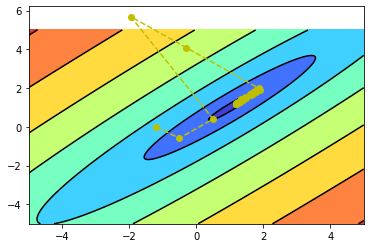

In [18]:
if __name__ == '__main__':
    main() 
    plt.show()

####**Перше завдання**

Тепер занотуємо, за скільки ітерацій буде досягнута точка при тих чи інших змінах:

*Примітка:* із кожного пункту при подальшому тестуванні будемо залишати перший підпункт і йти до наступного (перші підпункти вважатимуться дефолтними).

Результати після зміни:
1. Величини кроку h при обчисленні похідних:
 *  h = 0.000000000001: 30 ітерацій, Function Counts 4457 **[1.1783677930259087, 1.1798406763428058]**
 *  h = 0.00000000001:  6 ітерацій, Function Counts 4027 **[1.8355161619125115, 2.016811893181921]**
2. Схеми обчислення похідних:
 * центральна: 30 ітерацій, Function Counts 4457 **[1.1783677930259087, 1.1798406763428058]**
 * права: 6 ітерацій, Function Counts 4028 **[1.7531138413892153, 2.0877576852722814]**
 * ліва: 6 ітерацій, Function Counts 4028 **[1.8465632129037686, 2.0145955111566614]**
3. Способу обчислення кроку:
 * оптимальний: 30 ітерацій, Function Counts 4457 **[1.1783677930259087, 1.1798406763428058]**
 * постійний: 6 ітерацій, Function Counts 4027 **[1.8465632129037686, 2.0145955111566614]**
4. Виду методу одновимірного пошуку:
 * ДСК-Пауелла: 30 ітерацій, Counts 4457 **[1.1783677930259087, 1.1798406763428058]**
 * Золотого перетину: 14 ітерацій, Function Counts 401 **[0.9643572576317091, 0.9605273158709049]**
5. Точності методу одновимірного пошуку:
 * 0.01: 30 ітерацій, Function Counts 4457 **[1.1783677930259087, 1.1798406763428058]**
 * 0.001: 143 ітерацій, Function Counts 417787 **[0.9502566030741537, 0.9459774475667163]**
6. Значення параметру в алгоритмі Свена (*delta*):
 * 0.001: 30 ітерацій **[1.1783677930259087, 1.1798406763428058]**
 * 0.01: 90 ітерацій, Function Counts 113506 **[0.8645733379812286, 0.8556546751409558]**

7. Вигляду критерію закінчення:
 * sm: 30 ітерацій 30 ітерацій, Counts 4457 **[1.1783677930259087, 1.1798406763428058]**
 * big: 32 ітерацій, Function Counts 4616 **[0.9643572576317091, 0.9605273158709049]**

8. Модифікація у вигляді важкої кульки: 244 ітерацій, Function Counts 683343


  **[1.0841644889981867, 1.1036644959996114]**

####**Друге завдання**
Результат роботи програми: [0.06389856189085187, 0.0694413218538425]

13  ітерацій

Function Counts 316

Мінімум знаходиться в т. (1;1), але метод не може в неї потрапити, так як вона знаходиться поза областю. Метод намагається підійти якомога ближче до точки, але й бути якомога ближче до області. 



# Висновки

У даній роботі було розглянуто та опрацьовано метод градієнтного спуску, він же метод найшвидшого спуску та прослідковано його залежність від заданих параметрів та методів одномірного пошуку. Найкращий результат дали метод золотого перетину та критерій закінчення у вигляді системи (точка [0.9643572576317091, 0.9605273158709049]), найгірший - зменшення кроку h та лівоорієнтована схема обчислення похідної.

Метод штрафних функцій виконався трохи суперечливо, але логічно. Далеко від області він не може відійти, а точка знаходися у лівому верхньому куті, що ускладнює нормальний шлях до неї. Скоріше за все, справа в придуманій області.

Одне із найголовніших достоїнств методу найшвидшого спуску - це те, що данний метод першими кроками максимально швидко наближається до необхідної точки. Із недоліків - відносно дуже повільне просування в околі шуканої точки. Дану проблему можна вирішити компоновкою декількох методів, першу ітерацію якої буде робити якраз МНС.

Що ж до модифікації у вигляді методу важкої кульки, він спрацював непогано, але є досить ресурсно невигідним, так як більшу точність можна досягнути і меншою кількістю ітерацій.

# Автори

[Бурлаченко Яна Борисівна](https://github.com/yana5k/Optimization-Methods)

[Alex Honchar](https://github.com/Rachnog/Optimization-Algorithms)

# Список використаних джерел

1. Методичні матеріали за вказаними методами, надані лектором Ладогубець Т.С.
2. Ю. А. Ведерникова "Математические основы теории оптимизации"
3. [Градієнтний спуск](https://uk.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D1%96%D1%94%D0%BD%D1%82%D0%BD%D0%B8%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)
4. [Метод штрафов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%88%D1%82%D1%80%D0%B0%D1%84%D0%BE%D0%B2#:~:text=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D1%88%D1%82%D1%80%D0%B0%D1%84%D0%BE%D0%B2%20(%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D1%88%D1%82%D1%80%D0%B0%D1%84%D0%BD%D1%8B%D1%85%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9,%D1%88%D1%82%D1%80%D0%B0%D1%84%D0%B0%20%D0%B8%D0%BD%D0%BE%D0%B3%D0%B4%D0%B0%20%D1%81%D0%B2%D0%BE%D0%B4%D1%8F%D1%82%20%D0%BA%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%BC.)
5. [Gradient-Based Optimization](http://adl.stanford.edu/aa222/Lecture_Notes_files/AA222-Lecture3.pdf)